Understanding the Data

Model:

1.4WD/4X4 = Four-wheel drive
2.AWD = All-wheel drive
3.FFV = Flexible-fuel vehicle
4.SWB = Short wheelbase
5.LWB = Long wheelbase
6.EWB = Extended wheelbase

Transmission:

1.A = automatic
2.AM = automated manual
3.AS = automatic with select shift
4.AV = continuously variable
5.M = manual
6.3 - 10 = Number of gears

Fuel type:

1.X = regular gasoline
2.Z = premium gasoline
3.D = diesel
4.E = ethanol (E85)
5.N = natural gas

Fuel consumption: 

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

CO2 emissions:

the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

Vehicle class:

COMPACT: Smaller-sized vehicles.
SUV - SMALL: Smaller-sized sports utility vehicles.
MID-SIZE: Medium-sized vehicles.
TWO-SEATER: Vehicles with two seats.
MINICOMPACT: Very small-sized vehicles.
SUBCOMPACT: Smaller than compact-sized vehicles.
FULL-SIZE: Larger-sized vehicles.
STATION WAGON - SMALL: Smaller-sized station wagons.
SUV - STANDARD: Standard-sized sports utility vehicles.
VAN - CARGO: Vans designed for cargo.
VAN - PASSENGER: Vans designed for passenger transportation.
PICKUP TRUCK - STANDARD: Standard-sized pickup trucks.
MINIVAN: Smaller-sized vans.
SPECIAL PURPOSE VEHICLE: Vehicles designed for special purposes.
STATION WAGON - MID-SIZE: Mid-sized station wagons.
PICKUP TRUCK - SMALL: Smaller-sized pickup trucks.

In [1]:
import numpy as np
import pandas as pd         
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib_inline
import statsmodels.api as sm 
import warnings
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,RidgeCV,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score


In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\CO2 Emissions_Canada.csv")

In [4]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.tail(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
df.describe(include='O')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


from the above we loaded the dataset and done a basic data analysis using functions like info describe to ge an over view of the dataset

In [9]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Data visivalization

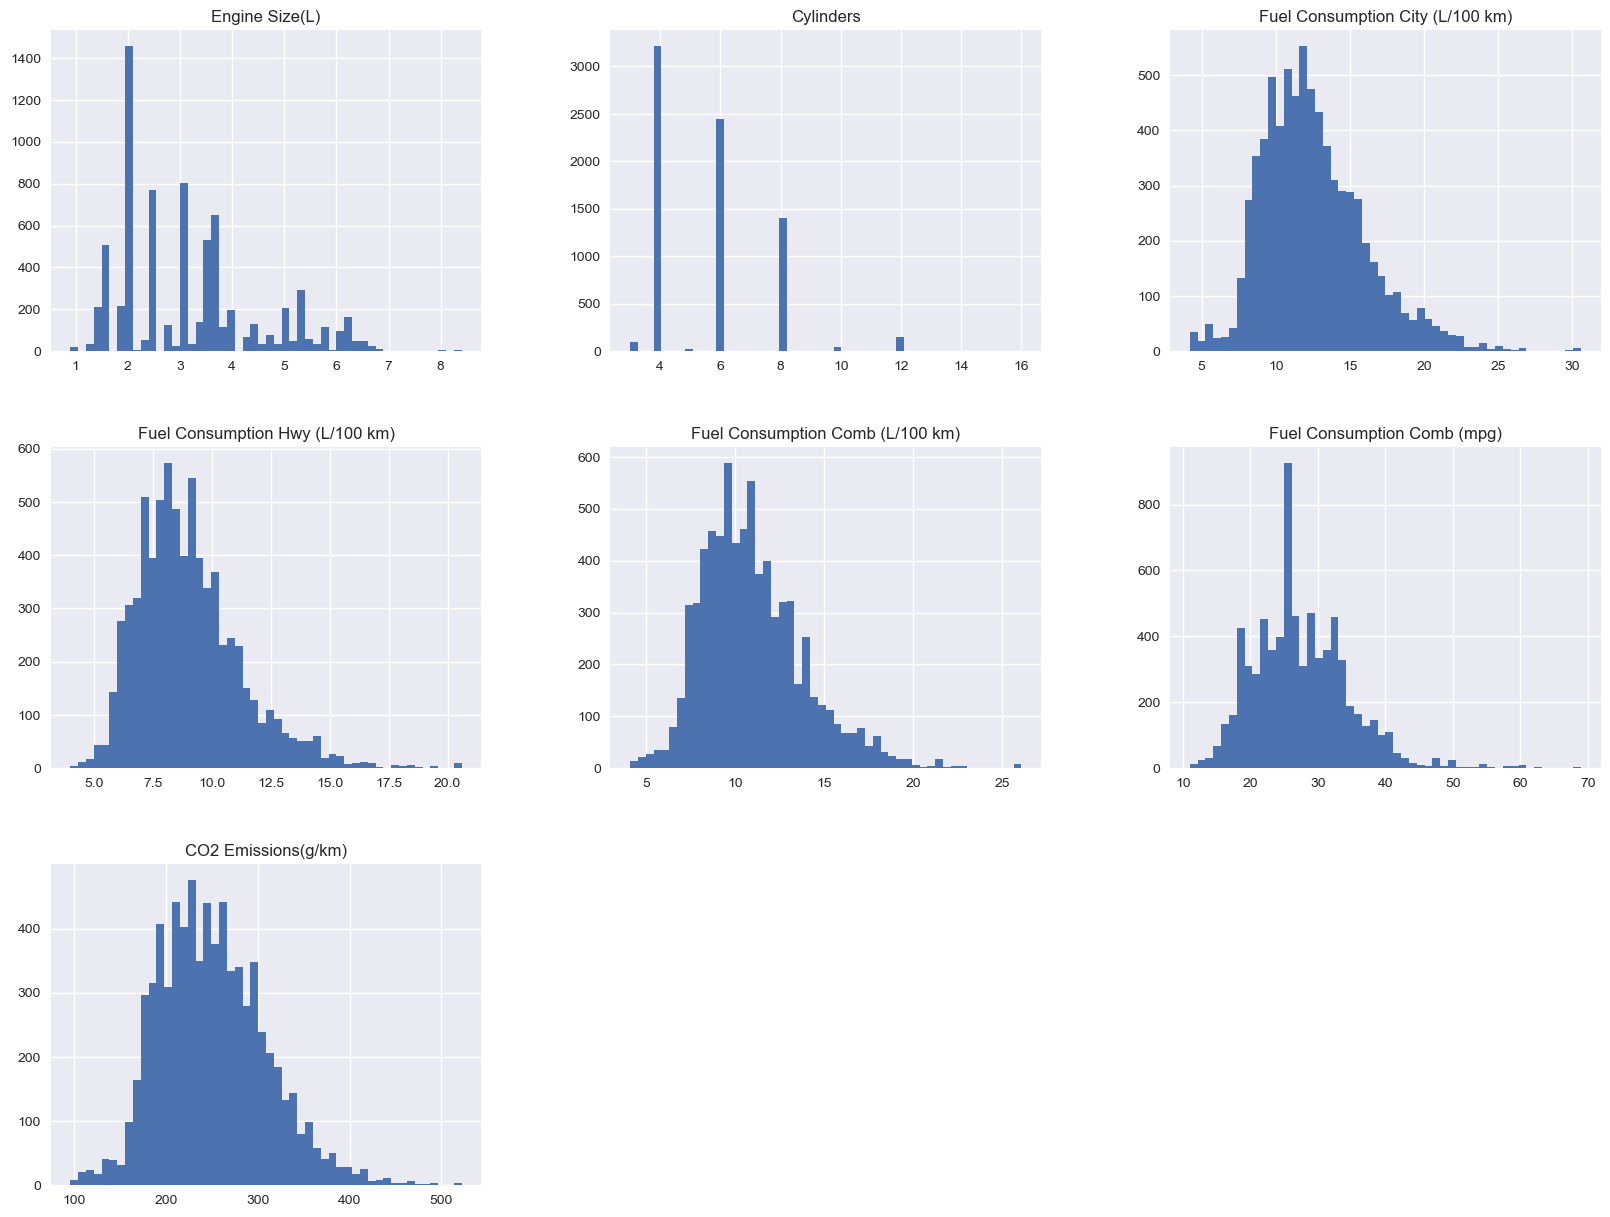

In [11]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
df['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

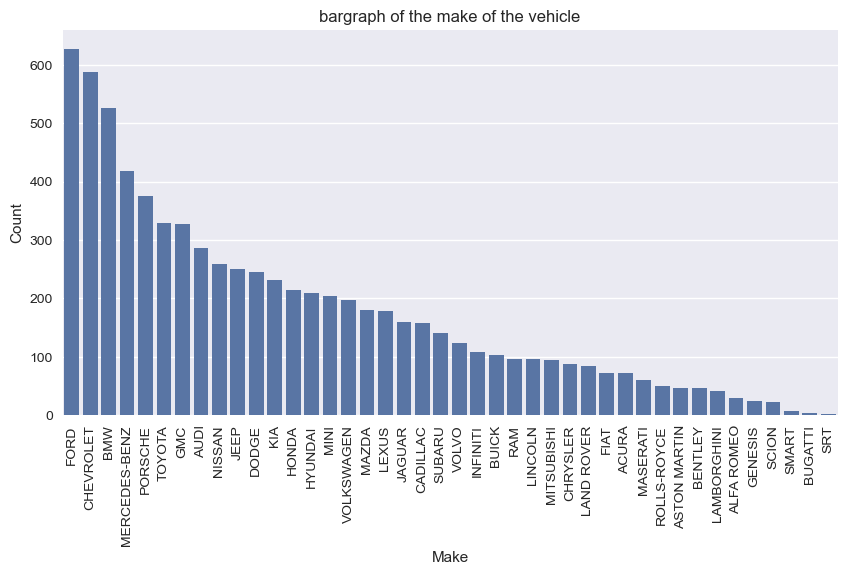

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Make'],data=df,order=df['Make'].value_counts().index)
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("bargraph of the make of the vehicle")
plt.xticks(rotation=90)
plt.show()

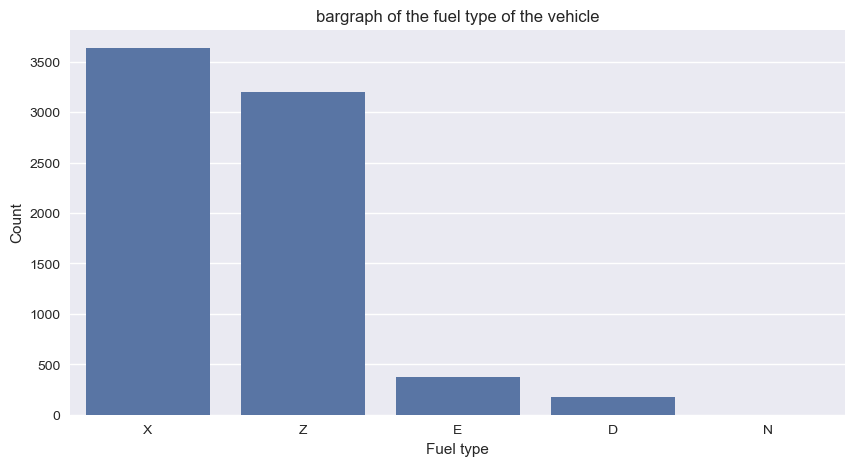

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Fuel Type'],data=df,order=df['Fuel Type'].value_counts().index)
plt.xlabel("Fuel type")
plt.ylabel("Count")
plt.title("bargraph of the fuel type of the vehicle")
plt.xticks(rotation=0)
plt.show()

In [15]:
df['Engine Size(L)'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

In [16]:
numreric_category=[feature for feature in df.columns if df[feature].dtype !='O']
category_feature=[feature for feature in df.columns if df[feature].dtype == 'O']

In [17]:
print('we have {} numerical features {}.'.format(len(numreric_category),numreric_category))
print('we have {}  categorical feature {}.'.format(len(category_feature),category_feature))

we have 7 numerical features ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'].
we have 5  categorical feature ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'].


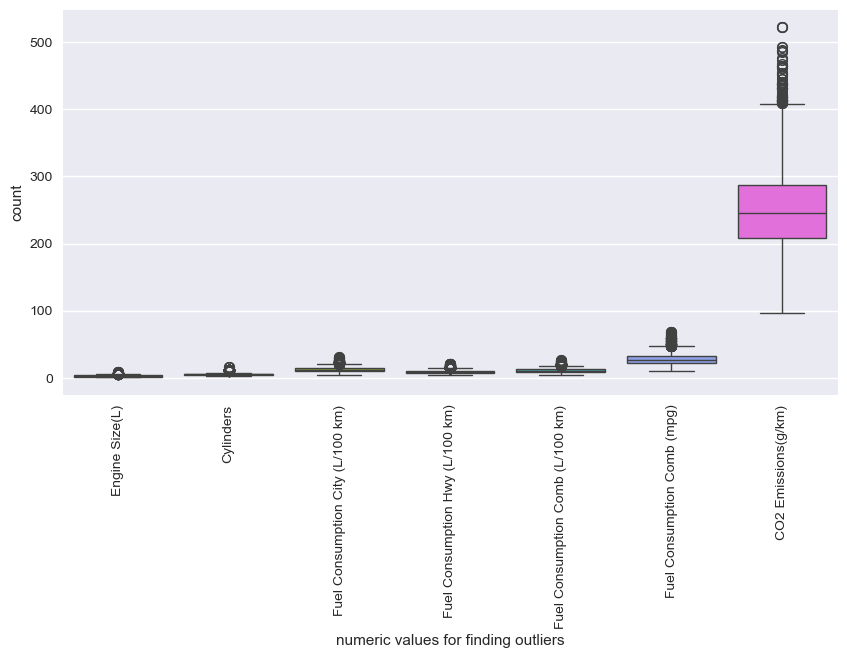

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.xlabel('numeric values for finding outliers')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [19]:
df['CO2 Emissions(g/km)'].mean()

250.58469871360867

In [20]:
mean_val = df['CO2 Emissions(g/km)'].mean()
Q1 = df['CO2 Emissions(g/km)'].quantile(0.25)
Q3 = df['CO2 Emissions(g/km)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['CO2 Emissions(g/km)'] = df['CO2 Emissions(g/km)'].apply(
    lambda x: mean_val if x < lower_bound or x > upper_bound else x
)


In [21]:
min,q1,median,q3,max=np.quantile(df[['CO2 Emissions(g/km)']],[0,0.25,0.50,0.75,1.0])

In [22]:
min,q1,median,q3,max

(96.0, 208.0, 246.0, 286.0, 408.0)

In [23]:
iqr=q3-q1

In [24]:
iqr

78.0

In [25]:
lower_fence=q1-1.5*iqr
higher_fence=q3+1.5*iqr

In [26]:
lower_fence

91.0

In [27]:
higher_fence

403.0

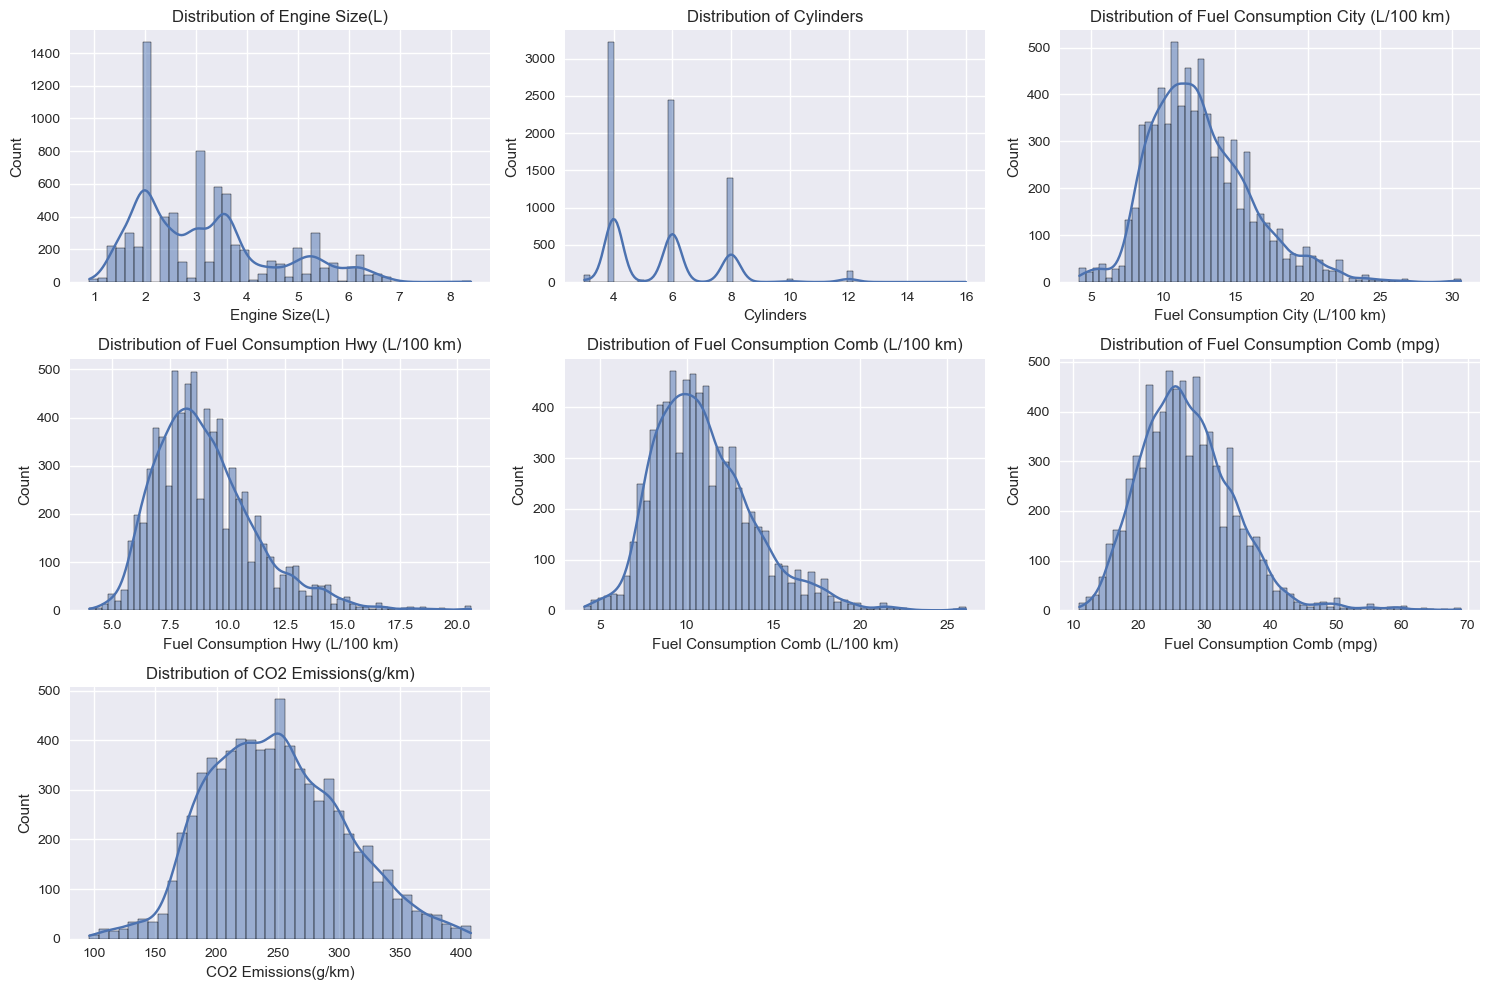

In [28]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   float64
dtypes: flo

In [30]:
df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'],axis=1,inplace=True)

In [31]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.824448
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.802444
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.863777
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.831707
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.863042
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.898150
CO2 Emissions(g/km),0.824448,0.802444,0.863777,0.831707,0.863042,-0.898150,1.000000


<Axes: >

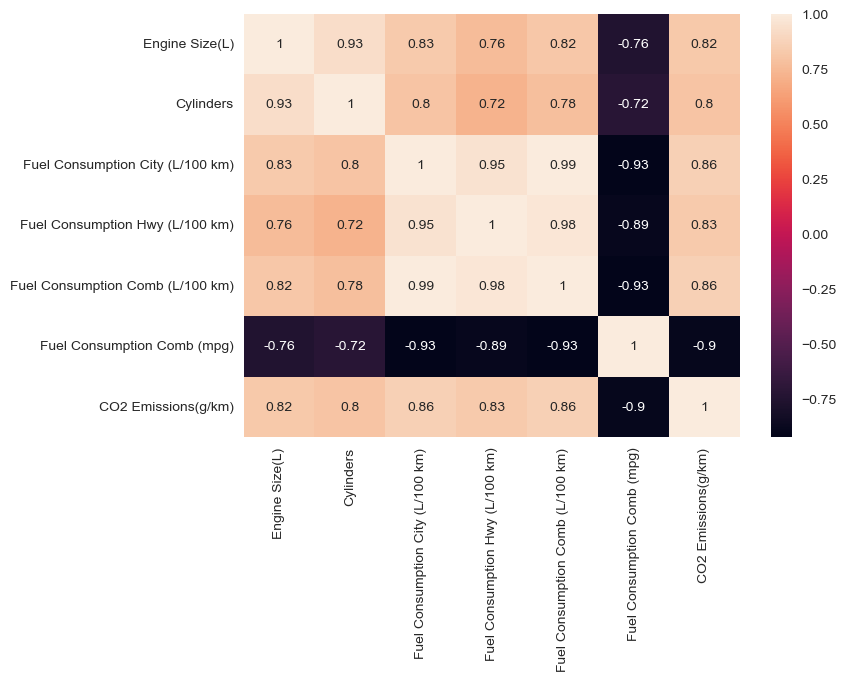

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
x=df.drop('CO2 Emissions(g/km)',axis=1)
y=df['CO2 Emissions(g/km)']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [35]:
scaler=StandardScaler()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=42)

In [37]:
x_train.shape

(4061, 6)

In [38]:
x_test.shape

(3324, 6)

In [39]:
x_train=scaler.fit_transform(x_train)

In [40]:
x_train

array([[-0.12539372,  0.19078626, -0.06150276, -0.11959606, -0.07537546,
        -0.18951808],
       [-0.12539372,  0.19078626, -0.63317296, -0.39244978, -0.56163402,
         0.37236031],
       [-0.12539372,  0.19078626,  0.59591797,  0.38063575,  0.54981411,
        -0.75139648],
       ...,
       [ 0.24211774,  0.19078626, -0.26158733, -0.11959606, -0.21430648,
        -0.04904848],
       [-0.49290517, -0.87640797, -0.89042455, -0.75625473, -0.83949605,
         0.79376911],
       [ 0.6096292 ,  1.25798049,  0.22433234,  0.47158699,  0.30668483,
        -0.47045728]])

In [41]:
x_test

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
7261,3.0,6,12.4,9.0,10.9,26
4489,4.4,8,17.3,11.6,14.7,19
1539,6.2,8,16.1,11.4,14.0,20
3532,5.3,8,14.6,10.3,12.7,22
6418,4.0,6,14.3,11.9,13.2,21
...,...,...,...,...,...,...
1427,2.4,4,12.7,9.1,11.1,25
4099,4.7,8,13.6,9.5,11.7,24
5812,3.5,6,16.2,12.8,14.7,19
3129,3.8,6,13.7,9.6,11.9,24


In [42]:
x_test=scaler.transform(x_test)

In [43]:
liner=LinearRegression()

In [44]:
liner.fit(x_train,y_train)

LinearRegression()

In [45]:
liner.coef_

array([ 10.98081388,  12.68621531, -14.18064543,  10.83901757,
        -6.13008695, -40.89501821])

In [46]:
y_pred=liner.predict(x_test)

In [47]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [48]:
print("--------------Performance Matrix----------------")
print(" Mean Absolute Error is :",mae)
print(" R2 Score is :",score)
print(" Mean Squared Error is :",mse)

--------------Performance Matrix----------------
 Mean Absolute Error is : 12.855318362929477
 R2 Score is : 0.8713491165988909
 Mean Squared Error is : 391.0526863267588


In [49]:
validation=cross_val_score(liner,x_train,y_train,scoring='r2',cv=5)

In [50]:
np.mean(validation)

0.8616275128866888

In [51]:
y_pred=liner.predict(x_test)

In [52]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [53]:
print("--------------Performance Matrix----------------")
print(" Mean Absolute Error is :",mae)
print(" R2 Score is :",score)
print(" Mean Squared Error is :",mse)

--------------Performance Matrix----------------
 Mean Absolute Error is : 12.855318362929477
 R2 Score is : 0.8713491165988909
 Mean Squared Error is : 391.0526863267588


In [54]:
ridge=Ridge()

In [55]:
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

--------------Performance Matrix----------------
 Mean Absolute Error is : 12.853096510810994
 R2 Score is : 0.8713522601018179


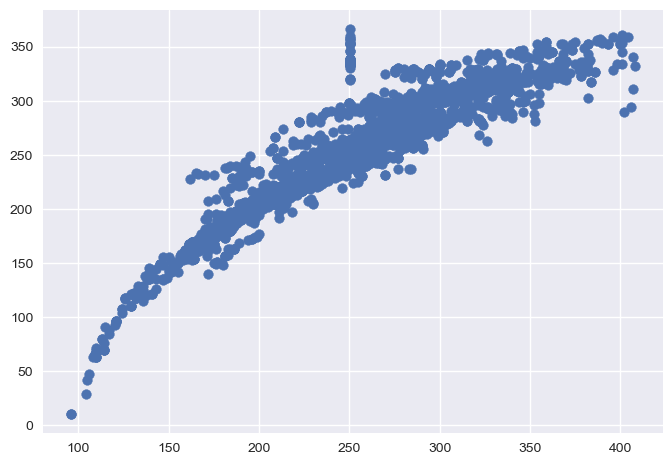

In [56]:
print("--------------Performance Matrix----------------")
print(" Mean Absolute Error is :",mae)
print(" R2 Score is :",score)
plt.scatter(y_test,y_pred)

In [57]:
ridge_cv=RidgeCV(cv=5)

In [58]:
ridge_cv.fit(x_train,y_train)
y_pred1=ridge_cv.predict(x_test)
mae1=mean_absolute_error(y_test,y_pred)
score1=r2_score(y_test,y_pred)

--------------Performance Matrix----------------
 Mean Absolute Error is : 12.853096510810994
 R2 Score is : 0.8713522601018179


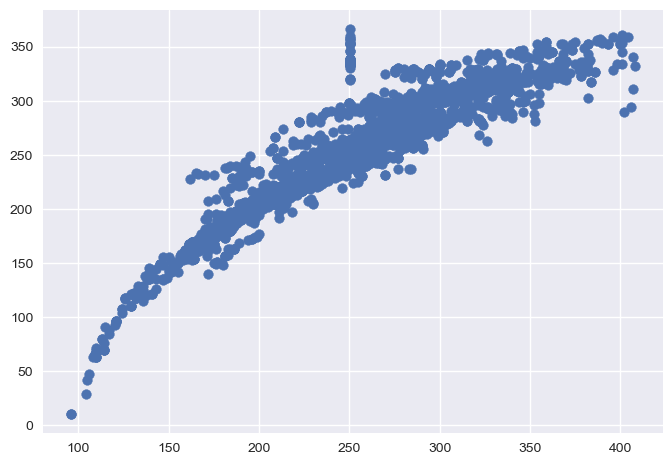

In [59]:
print("--------------Performance Matrix----------------")
print(" Mean Absolute Error is :",mae1)
print(" R2 Score is :",score1)
plt.scatter(y_test,y_pred1)

In [60]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge_cv.pkl','wb'))